# A brief tutorial of NetworkX

Made for the network science course @ DCC/FCUP (2024/2025 edition)

## Main Links

- [NetworkX website](https://networkx.org/) | [Install](https://networkx.org/documentation/stable/install.html) | [Reference](https://networkx.org/documentation/stable/reference/index.html) | [Tutorial](https://networkx.org/documentation/stable/tutorial.html) | [Gallery](https://networkx.org/documentation/stable/auto_examples/index.html)

## Importing the library into Python

After starting Python, import the networkx module:

In [517]:
import networkx as nx

## Creating a graph

### Network types

NetworkX provides 4 basic graph types (all of them allow for _self-loops_):
- `Graph`: **undirected** with **no** parallel edges
- `DiGraph`: **directed** with **no** parallel edges
- `MultiGraph`: **undirected multigraph** (with parallel edges)
- `MultiDiGraph`: **directed multigraph** (with parallel edges)

In [518]:
# Creating a graph of each of the basic 4 types
G1 = nx.Graph();
G2 = nx.DiGraph();
G3 = nx.MultiGraph();
G4 = nx.MultiDiGraph();

# Showing what it prints
print(G1, G2, G3, G4, sep='\n');

Graph with 0 nodes and 0 edges
DiGraph with 0 nodes and 0 edges
MultiGraph with 0 nodes and 0 edges
MultiDiGraph with 0 nodes and 0 edges


### Creation approaches

There are essentially 3 ways to create a graph:

1. Adding edges and nodes **explicitly**
2. Graph [**generators**](https://networkx.org/documentation/stable/reference/generators.html) (standard algorithms to create network topologies)
3. **Importing** data from pre-existing (usually file) sources (see [reading and writing graphs](https://networkx.org/documentation/stable/reference/readwrite/index.html))


### Adding edges and nodes explicitly

Here is our first example of an undirected graph:

[1, 2, 3, 'four', 5, 6]
[(1, 2), (1, 'four'), (1, 3), (2, 3), (2, 5), (2, 6), (3, 'four')]


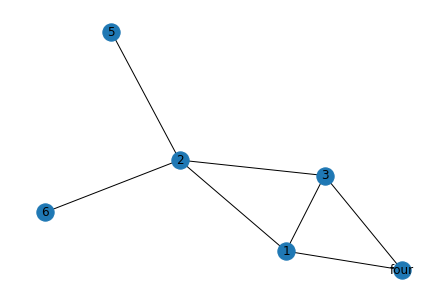

In [519]:
# Create an empty undirected graph
G = nx.Graph()

# Create some nodes
G.add_node(1)            # create a single node
G.add_nodes_from([2,3])  # create nodes from a list
G.add_node("four")       # node labels can be of different types (anything hashable)

# Create some edges
G.add_edge(1,2)
G.add_edges_from([(2,3),(3,"four"), ("four", 1), (1,3)])
G.add_edges_from([(2,5),(2,6)]) # if a node does not exist, it is created

# Show nodes and edges
print(G.nodes)
print(G.edges)

# Draw the graph (more on this later)
nx.draw(G, with_labels = True)


Here an example directed graph (a *feedforward loop*):

In [520]:
# And now directed graph
G = nx.DiGraph()
G.add_edges_from([(42,21), (42,0), (21,0)])
nx.draw(G, with_labels=True)

### Attributes

Nodes and edges can have arbitrary attributes (graphs are essentially a ["dictionary of dictionaries"](https://networkx.org/documentation/stable/reference/introduction.html))

In [521]:
G = nx.Graph() # a new empty undirected graph

# Example of node attributes
G.add_node(1, name="Pedro", number=42, color="orange")             # add a node with three attributes
G.add_nodes_from([(2, {"color": "red"}), (3, {"color": "green"})]) # attributes can be added as dictionaries
print(G.nodes.data())                                              # nodes and their attributes

# Changing node attributes
G.add_node(1, color="blue")  # adding again will change the attribute
G.nodes[1]["name"] = "Peter" # we can also use as any dictionary
print(G.nodes.data())

# Traversing nodes using node dictionary keys
for v in G.nodes: print("node", v, G.nodes[v])  # get individuallly all nodes and their attributes

# We can get just one specific node attribute
print("colors:", G.nodes.data("color"))                # a list of tuples with all node values for "color"
print("colors: ", nx.get_node_attributes(G, "color"))  # a dictionary of all node values for "color"

# Example of edge attributes
G.add_edge(1, 2, weight=1.5)                           # add an edge with one attribute
G.add_weighted_edges_from([(2, 3, 3.1), (1, 3, 1.2)])  # some attributes have specialized functions
print(G.edges.data())                                  # get all data from edges
print("weights:", nx.get_edge_attributes(G, "weight")) # a dictionary of all edge values for "weight"

[(1, {'name': 'Pedro', 'number': 42, 'color': 'orange'}), (2, {'color': 'red'}), (3, {'color': 'green'})]
[(1, {'name': 'Peter', 'number': 42, 'color': 'blue'}), (2, {'color': 'red'}), (3, {'color': 'green'})]
node 1 {'name': 'Peter', 'number': 42, 'color': 'blue'}
node 2 {'color': 'red'}
node 3 {'color': 'green'}
colors: [(1, 'blue'), (2, 'red'), (3, 'green')]
colors:  {1: 'blue', 2: 'red', 3: 'green'}
[(1, 2, {'weight': 1.5}), (1, 3, {'weight': 1.2}), (2, 3, {'weight': 3.1})]
weights: {(1, 2): 1.5, (1, 3): 1.2, (2, 3): 3.1}


### Graph generators

Graph [generators](https://networkx.org/documentation/stable/reference/generators.html) are standard algorithms to create specific network topologies

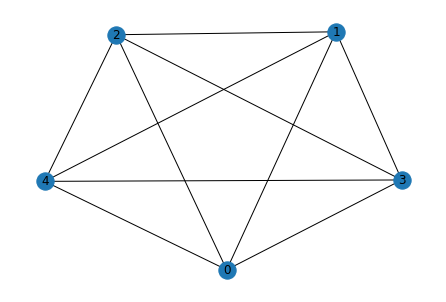

In [522]:
# a clique of size 5
G = nx.complete_graph(5)
nx.draw(G, with_labels=True)

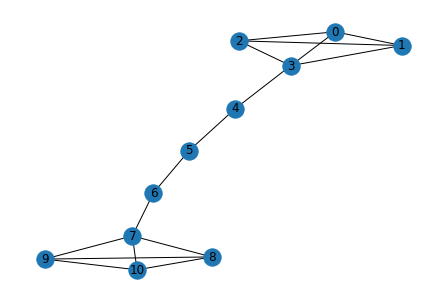

In [523]:
# a barbelll graph of two cliques of size 4 connected by a path of size 3
G = nx.barbell_graph(4, 3)
nx.draw(G, with_labels=True)

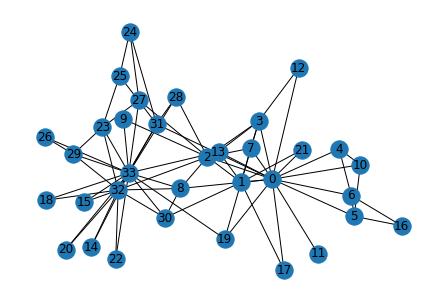

In [524]:
# You know this network, right? :)
G = nx.karate_club_graph()
nx.draw(G, with_labels=True)

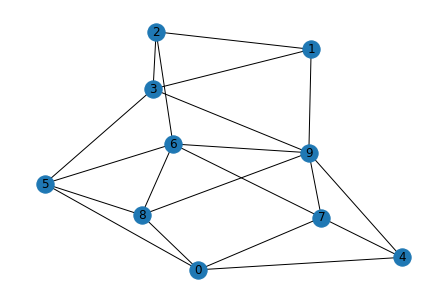

In [525]:
# Returns a random Erdős-Rényi graph with 10 nodes and 0.3 probability of coonnection
G = nx.erdos_renyi_graph(10, 0.3)
nx.draw(G, with_labels=True)

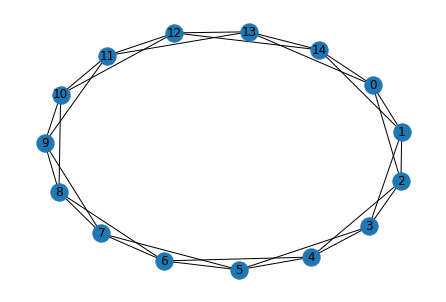

In [526]:
# Returns a random Watts–Strogatz graph with 10 nodes each with 4 neighbors and 0.0 rewiring probability
G = nx.watts_strogatz_graph(15, 4, 0.0)
nx.draw(G, with_labels=True)

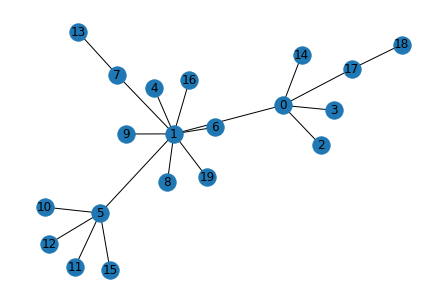

In [527]:
# Returns a random Barabasi-Albert graph with n=20 nodes and each new node connects to m=1 nodes
G = nx.barabasi_albert_graph(20,1)
nx.draw(G, with_labels=True)

### Reading and Writing Graphs

NetworkX provides for [reading and writing](https://networkx.org/documentation/stable/reference/readwrite/index.html) in multiple formats:

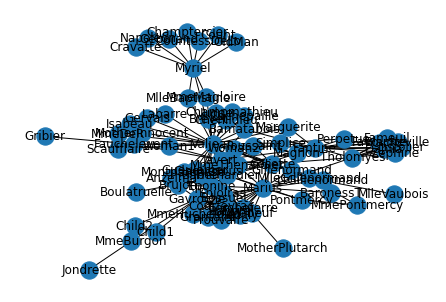

In [528]:
# You can get this file at https://github.com/gephi/gephi/wiki/Datasets
G = nx.read_gml("lesmiserables.gml")
nx.draw(G, with_labels=True)

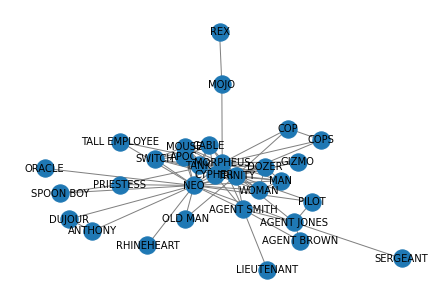

In [529]:
# You can get this file at https://doi.org/10.7910/DVN/T4HBA3/BIOFH6
G = nx.read_gexf("matrix.gexf") # Co-appeareance network of "The Matrix" movie
nx.draw(G, with_labels=True, font_size=10, width=1, edge_color="gray",
           labels=nx.get_node_attributes(G, "label"))

In [530]:
# Writing a graph in GML
G = nx.cycle_graph(6)
nx.write_gml(G, "cycle.gml")

# Reading and printing the graph to check
H = nx.read_gml("cycle.gml")
print(H, H.nodes, H.edges, sep="\n")

Graph with 6 nodes and 6 edges
['0', '1', '2', '3', '4', '5']
[('0', '1'), ('0', '5'), ('1', '2'), ('2', '3'), ('3', '4'), ('4', '5')]


### Reporting graph data

Graphs have four _"views"_ that report information:
- nodes
- edges
- adjacency list
- degree

In [531]:
G = nx.complete_graph(4)

print(G)
print(type(G))
print("nodes:", G.nodes)
print(type(G.nodes))
print("edges:", G.edges)
print(type(G.edges))
print("adj:", G.adj)
print(type(G.adj))
print("degree:", G.degree)
print(type(G.degree))


Graph with 4 nodes and 6 edges
<class 'networkx.classes.graph.Graph'>
nodes: [0, 1, 2, 3]
<class 'networkx.classes.reportviews.NodeView'>
edges: [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]
<class 'networkx.classes.reportviews.EdgeView'>
adj: {0: {1: {}, 2: {}, 3: {}}, 1: {0: {}, 2: {}, 3: {}}, 2: {0: {}, 1: {}, 3: {}}, 3: {0: {}, 1: {}, 2: {}}}
<class 'networkx.classes.coreviews.AdjacencyView'>
degree: [(0, 3), (1, 3), (2, 3), (3, 3)]
<class 'networkx.classes.reportviews.DegreeView'>


We can use this to acess specific parts of the graph

In [532]:
G = nx.cycle_graph(5)

print("Properties of node 0:")
print("  - neighbors:", list(G.adj[0]));
print("  - degree:", G.degree[0]);

print("Edges of nodes 1 and 2:", G.edges([1,2]))
print("Degrees nodes 1 and 2:", G.degree([1,2]))

print("Neighbors of node 1", G[1]) # same as G.adj[1]

Properties of node 0:
  - neighbors: [1, 4]
  - degree: 2
Edges of nodes 1 and 2: [(1, 0), (1, 2), (2, 3)]
Degrees nodes 1 and 2: [(1, 2), (2, 2)]
Neighbors of node 1 {0: {}, 2: {}}


### Graph Operations

We can use [graph operations](https://networkx.org/documentation/stable/tutorial.html#graph-generators-and-graph-operations) to obtain new graphs:

In [533]:
G1 = nx.cycle_graph(4)
G2 = nx.complement(G1)
G3 = nx.subgraph(G1, [1,2,3])

print("G1:", G1.edges)
print("G2:", G2.edges)
print("G3:", G3.edges)

G1: [(0, 1), (0, 3), (1, 2), (2, 3)]
G2: [(0, 2), (1, 3)]
G3: [(1, 2), (2, 3)]


## Graph Analysis

There are many algorithms you can choose to analyse a graph (see [Algorithms](https://networkx.org/documentation/stable/reference/algorithms/index.html) and also [Functions](https://networkx.org/documentation/stable/reference/functions.html)). \
We now show a selected short list of existing algorithms (mainly covering some of the topics discussed on the course).

### Example degree metrics

Degrees: [2, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1]
Degree Histogram: [0, 8, 1, 6]


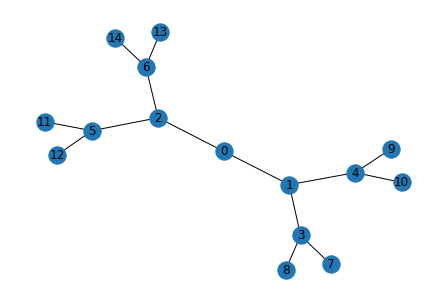

In [534]:
G = nx.balanced_tree(2, 3)
nx.draw(G, with_labels=True)

print("Degrees:", [d for _,d in G.degree])
print("Degree Histogram:", nx.degree_histogram(G))

### Example distance and shortest path metrics

Diameter: 4
Average Shortest Path: 2.769230769230769
Eccentricity: {0: 2, 1: 3, 2: 3, 3: 3, 4: 4, 5: 4, 6: 4, 7: 4, 8: 4, 9: 4, 10: 4, 11: 4, 12: 4}
Center: [0]
Periphery: [4, 5, 6, 7, 8, 9, 10, 11, 12]

Shortest path between 9 and 12: [9, 2, 0, 3, 12]
Its length: 4
Has path? True

SSSP from node 10: ({10: 0, 3: 1, 0: 2, 11: 2, 12: 2, 1: 3, 2: 3, 4: 4, 5: 4, 6: 4, 7: 4, 8: 4, 9: 4}, {10: [10], 3: [10, 3], 0: [10, 3, 0], 11: [10, 3, 11], 12: [10, 3, 12], 1: [10, 3, 0, 1], 2: [10, 3, 0, 2], 4: [10, 3, 0, 1, 4], 5: [10, 3, 0, 1, 5], 6: [10, 3, 0, 1, 6], 7: [10, 3, 0, 2, 7], 8: [10, 3, 0, 2, 8], 9: [10, 3, 0, 2, 9]})


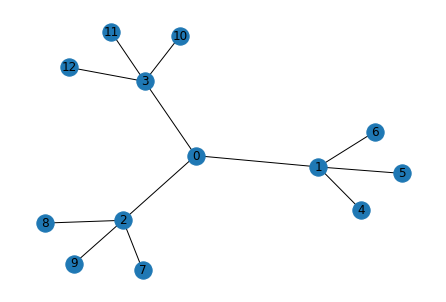

In [535]:
G = nx.balanced_tree(3, 2)
nx.draw(G, with_labels=True)

print("Diameter:", nx.diameter(G))
print("Average Shortest Path:", nx.average_shortest_path_length(G))
print("Eccentricity:", nx.eccentricity(G))
print("Center:", nx.center(G))
print("Periphery:", nx.periphery(G))

print()

print("Shortest path between 9 and 12:", nx.shortest_path(G, 9, 12))
print("Its length:", nx.shortest_path_length(G, 9, 12))
print("Has path?",  nx.has_path(G, 9, 12))

print()

print("SSSP from node 10:", nx.single_source_dijkstra(G,10))

### Example connectivity metrics

Original Graph
Nr Components: 1
Components [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}]

After removing nodes 3 and 6
Nr Components: 3
Components: [{0, 1, 2}, {4, 5}, {8, 9, 7}]


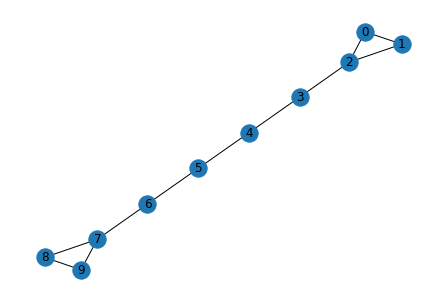

In [536]:
G = nx.barbell_graph(3,4)
nx.draw(G, with_labels=True)

print("Original Graph")
print("Nr Components:", nx.number_connected_components(G))
print("Components", list(nx.connected_components(G)))

print()

G.remove_nodes_from([3,6])
print("After removing nodes 3 and 6")
print("Nr Components:", nx.number_connected_components(G))
print("Components:", list(nx.connected_components(G)))


### Example centralities and clustering

Clustering coefficient: {'3372518': 1.0, '3368683': 0.4, '3368424': 0.42857142857142855, '3368801': 1.0, '3369601': 0.9642857142857143, '3371227': 0.9642857142857143, '3368585': 1.0, '3372710': 1.0, '3368276': 0.6515151515151515, '3370502': 0.9047619047619048, '3368815': 1.0, '3369674': 1.0, '3368427': 0, '3368259': 1.0, '3371823': 0, '3368515': 0.3235294117647059, '3371166': 0.9642857142857143, '3368749': 0.2134387351778656, '3374399': 1.0, '3372009': 0, '3373932': 1.0, '3371904': 0.6666666666666666, '3371868': 0, '3369067': 0, '3374068': 0, '3371940': 1.0, '3371343': 1.0, '3369113': 1.0, '3370993': 0.8611111111111112, '3368301': 0.3464052287581699, '3368269': 1.0}
Closeness centrality: {'3372518': 0.375, '3368683': 0.5263157894736842, '3368424': 0.5555555555555556, '3368801': 0.45454545454545453, '3369601': 0.5357142857142857, '3371227': 0.5357142857142857, '3368585': 0.45454545454545453, '3372710': 0.45454545454545453, '3368276': 0.6, '3370502': 0.5263157894736842, '3368815': 0.4545

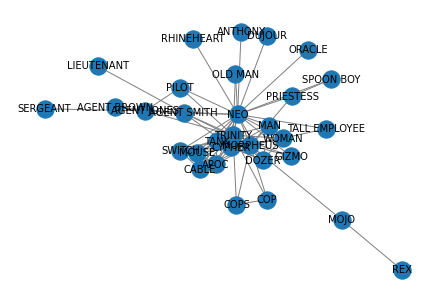

In [537]:
G=nx.read_gexf("matrix.gexf")
nx.draw(G, with_labels=True, font_size=10, width=1, edge_color="gray",
           labels=nx.get_node_attributes(G, "label"))

print("Clustering coefficient:", nx.clustering(G))
print("Closeness centrality:", nx.closeness_centrality(G))
print("Betweenness centrality:", nx.betweenness_centrality(G))
print("PageRank:", nx.pagerank(G))

print()

k = 5
decimal = 3
print("Top", k, "for:")
lst = [(G.nodes[k]["label"],round(v,decimal)) for (k,v) in sorted(nx.clustering(G).items(), key=lambda x : x[1], reverse=True)]
print("Clustering: ", lst[:k])

lst = [(G.nodes[k]["label"],round(v,decimal)) for (k,v) in sorted(nx.closeness_centrality(G).items(), key=lambda x : x[1], reverse=True)]
print("Closeness:   ", lst[:k])

lst = [(G.nodes[k]["label"],round(v,decimal)) for (k,v) in sorted(nx.pagerank(G).items(), key=lambda x : x[1], reverse=True)]
print("Betweenness:",lst[:k])

lst = [(G.nodes[k]["label"],round(v,decimal)) for (k,v) in sorted(nx.betweenness_centrality(G).items(), key=lambda x : x[1], reverse=True)]
print("PageRank:   ", lst[:k])





### Example community detection

In [538]:
G = nx.karate_club_graph()

coms = nx.community.louvain_communities(G)
print(coms)
print("Modularity:", nx.community.modularity(G, coms))

print()

coms = nx.community.girvan_newman(G)
print(list(coms)[0]) # Communities after first division


[{0, 1, 2, 3, 7, 11, 12, 13, 17, 19, 21}, {16, 4, 5, 6, 10}, {24, 25, 28, 31}, {32, 33, 8, 9, 14, 15, 18, 20, 22, 23, 26, 27, 29, 30}]
Modularity: 0.4438541256723075

({0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21}, {2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33})


## Drawing graphs

### Introduction

NetworkX provides [basic functionality for visualizing graphs](https://networkx.org/documentation/stable/reference/drawing.html), but its main goal is to enable graph analysis rather than perform graph visualization.

Citing NetworkX documentation: *"Proper graph visualization is hard, and we highly recommend that people visualize their graphs with tools dedicated to that task. Notable examples of dedicated and fully-featured graph visualization tools are Cytoscape, Gephi, Graphviz and, for LaTeX typesetting, PGF/TikZ. To use these and other such tools, you should export your NetworkX graph into a format that can be read by those tools."*

The `draw` command we have been using uses [matplotlib](https://matplotlib.org/):

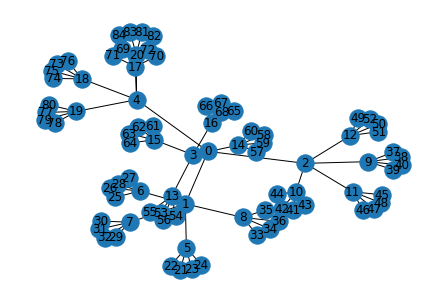

In [539]:
G = nx.balanced_tree(4,3)

nx.draw(G, with_labels=True)

### Drawing arguments

It accepts [many possible arguments](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html):

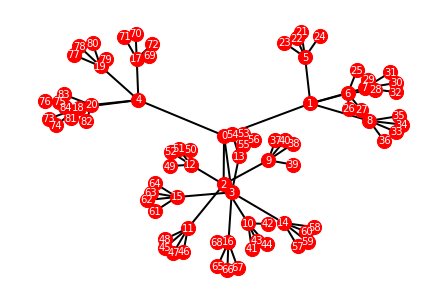

In [540]:
G = nx.balanced_tree(4,3)

nx.draw(G, with_labels=True,
        node_size=200,      # size of nodes
        font_size=10,       # text label size
        node_color="red",   # color of nodes
        font_color="white", # color of nodes
        width=2,            # width of edges
        pos=nx.spring_layout(G, iterations=500, k=1.5)
        )

### Graph layout

Node positioning is controled by the `pos` argument, and we can use other [layout algorithms](https://networkx.org/documentation/stable/reference/drawing.html#module-networkx.drawing.layout) other than de default spring layout:

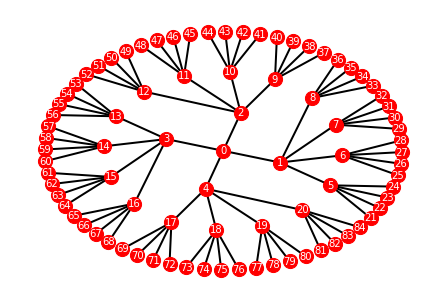

In [541]:
G = nx.balanced_tree(4,3)

# Concentric shells of nodes (can you see what's happening here?)
shell1 = list(range(4**0))
shell2 = list(range(4**0, 4**0 + 4**1))
shell3 = list(range(4**0 + 4**1, 4**0 + 4**1 + 4**2))
shell4 = list(range(4**0 + 4**1 + 4**2, 4**0 + 4**1 + 4**2 + 4**3))

nx.draw(G, with_labels=True,
        node_size=200,      # size of nodes
        font_size=10,       # text label size
        node_color="red",   # color of nodes
        font_color="white", # color of nodes
        width=2,            # width of edges
        pos=nx.shell_layout(G,rotate=-0.15,nlist=[shell1, shell2, shell3, shell4])
        )

We can even have a manual layout:

In [542]:
# Example adapted from networkx gallery
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3), (1, 5), (2, 3), (3, 4), (4, 5)])

# explicitly set positions
pos = {1: (0, 0), 2: (-1, 0.3), 3: (2, 0.17), 4: (4, 0.255), 5: (5, 0.03)}

options = {
    "with_labels": True,
    "font_size": 25,
    "node_size": 1000,
    "node_color": "white",
    "edgecolors": "blue",
    "linewidths": 3,
    "width": 5,
}
nx.draw(G, pos, **options)

### Coloring

You can use different colors for different nodes (and the same could be done for edges):

In [543]:
G = nx.karate_club_graph()

# Give colors using already defined communities in attribute "club"
colors = []
for _,att in G.nodes.data():
    if att["club"] == "Mr. Hi": colors.append("red")
    elif att["club"] == "Officer": colors.append("blue")

nx.draw(G, node_color=colors)

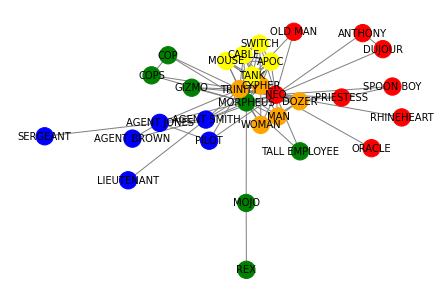

In [551]:
G = nx.read_gexf("matrix.gexf")

# Give colors using communities computed with greedy modularity optimization
coms = nx.community.greedy_modularity_communities(G)

colors = ["black"] * G.number_of_nodes()
use=["red","green","blue","orange","yellow","cyan","brown","gray"]
for i in range(len(coms)):
    for v in coms[i]:
        colors[list(G.nodes).index(v)] = use[i] # slow but just to demonstrate

nx.draw(G, with_labels=True, node_color=colors, font_size=10, width=1, edge_color="gray",
           labels=nx.get_node_attributes(G, "label"))


In [545]:
G = nx.erdos_renyi_graph(50, 0.025, 20)

# Give colors for connected components with more than one element
comps = nx.connected_components(G)

colors = ["black"] * G.number_of_nodes()
use=["red","green","blue","orange","yellow","cyan","brown","gray"]
cur_color = 0
for cc in comps:
    if len(cc) > 1:
        for v in cc: colors[v] = use[cur_color]
        cur_color += 1

nx.draw(G, node_size=30, node_color=colors)

### Gallery of graph drawings

The documentation includes an extensive [gallery of example drawings](https://networkx.org/documentation/stable/auto_examples/index.html#drawing) with downloadble code.
\

## Other Features

Here we have just given a brief overview of NetworkX.

Here are some areas not explored here that could be of interest to you (among others):

- **Efficiency**:

  - The documention of algorithms will often include the ***complexity** of the associated function and an associated paper. \   
    Sometimes there might be different versions of the same function. See for example: [fast_gnp_random_graph](https://networkx.org/documentation/stable/reference/generated/networkx.generators.random_graphs.fast_gnp_random_graph.html) _vs_ [gnp_random_graph](https://networkx.org/documentation/stable/reference/generated/networkx.generators.random_graphs.gnp_random_graph.html)
  - There are **approximation** versions of some algorithms that trade accuracy for better execution times. \
    See the [Approximations and Heuristics](https://networkx.org/documentation/stable/reference/algorithms/approximation.html) section of the documentation.

  - There are **parallel** and **GPU** backends for NetworkX that might provide faster alternatives for part of the library. \
    See the [Backends](https://networkx.org/documentation/stable/backends.html) section of the documentation.

- **LaTeX** integration:

  - If you writing a paper in LaTeX you can export a NetworkX graph drawing using TikZ in such a way that you can then include the drawing with very high quality and resolution. \
    See the [LaTeX section](https://networkx.org/documentation/stable/reference/drawing.html#module-networkx.drawing.nx_latex) in the documentation.

- **Linear Algebra**:

  - There are functions related to a linear algebra interpretation of graphs that allow you to approach the networks from a spectral graph theory perspective.
    See the [Linear Algebra](https://networkx.org/documentation/stable/reference/linalg.html) section in the documentation.

- **Algorithms**:

  - The algorithms section is vast and includes many areas that were not discussed in this notebook, such as graph isomorphism, graph distance and graph minors; flows, matchings and cuts; link prediction; cliques and cycles; tree and DAGs related computations such as LCA and arborescence, etc. \
  See the [Algorithms](https://networkx.org/documentation/stable/reference/algorithms/index.html) section in te documentation.

- **Contributing to NetworkX**:

  - You can contribute to NetworkX as a developer and help implement new functionality or improve the existing code.
    See the [Developer](https://networkx.org/documentation/stable/developer/index.html) section.